* **[Phase 1 - Data Collection and Visualization](#phase1)**
   - [Imports & Installations](#import)
   - [Data Loading](#step01)   
   - [Data Parsing & Cleaning](#step02)  
   - [Data Flattening](#step03)  
   - [Exporting Data to Excel](#step04)  

* **[Phase 2 - Data Storage and Processing Pipeline](#phase2)**
   - [creating database and importing data](#step11)
   - [Database Queries and Explorations](#step12)
   - [Review Initial Insights (EDA)](#step13)
   - [Perform Advanced Feature Engineering](#step14)
   - [Image Data Preprocessing and Visual Feature Extraction](#step15)
   - [Comprehensive Data Preprocessing](#step16)
   - [Blurry Image Detection and Labeling](#step17)
   - [Blurry Image Statics](#step21)
   - [Creating an AI Pipeline](#step18)
   - [General Overview of the Database](#step19)
   - [CI/CD  Implementation](#step20)
* **[Phase 3 - Final Conclusions and Model Development](#phase3)**


<a id='phase1'></a>
## **Phase 1 - Data Collection and Visualization**

<a id='import'></a>
### **Imports & Installations**

In [ ]:
# !pip install kagglehub
# !pip install openpyxl

In [ ]:
import xml.etree.ElementTree as ET
import kagglehub
import os
import pandas as pd

<a id='step01'></a>
### **Data Loading**

In [ ]:
# path_to_dataset = "content"
"""
If the dataset is not downloaded to your local machine you can use the following
commented command:
"""
path_to_dataset = kagglehub.dataset_download("andrewmvd/car-plate-detection")

annotation_folder = os.path.join(path_to_dataset, "annotations")
image_folder = os.path.join(path_to_dataset, "images")

<a id='step02'></a>
### **Data Parsing & Cleaning**

In [ ]:
def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    size = {
        'width': root.find('size/width').text,
        'height': root.find('size/height').text
    }

    objects = [{
            'bndbox': {
                'xmin': object.find('bndbox/xmin').text,
                'ymin': object.find('bndbox/ymin').text,
                'xmax': object.find('bndbox/xmax').text,
                'ymax': object.find('bndbox/ymax').text,
            }
        } for object in root.findall('object')]

    extracted_info = {
        'folder': root.find('folder').text,
        'filename': root.find('filename').text,
        'size': size,
        'objects': objects
    }

    return extracted_info


<a id='step03'></a>
### **Data Flattening**

In [ ]:
records = []
for file in os.listdir(annotation_folder):
    if file.endswith(".xml"):
        data = parse_xml(os.path.join(annotation_folder, file))
        for obj in data["objects"]:
            row = {
                "filename": data["filename"],
                "xmin": int(obj["bndbox"]["xmin"]),
                "ymin": int(obj["bndbox"]["ymin"]),
                "xmax": int(obj["bndbox"]["xmax"]),
                "ymax": int(obj["bndbox"]["ymax"])
            }
            records.append(row)


<a id='step04'></a>
### **Converting Data to PD Data Frame**

In [ ]:
df = pd.DataFrame(records)
print(df.head(15))

       filename  xmin  ymin  xmax  ymax
0   Cars339.png   209   135   283   169
1    Cars13.png   191   147   242   169
2    Cars74.png   115   115   277   153
3    Cars16.png    36   175    62   186
4   Cars291.png    71   205   215   246
5   Cars236.png   223   106   250   119
6   Cars429.png    86   166   208   195
7   Cars132.png    23   190    56   198
8   Cars132.png   378   188   400   200
9   Cars251.png   136   134   210   153
10   Cars51.png   264   141   318   162
11  Cars165.png   209   217   293   254
12  Cars313.png   176   211   252   246
13  Cars240.png   171   116   232   132
14  Cars201.png   216   171   367   208


<a id='phase2'></a>
## **Phase 2 - Data Storage and Processing Pipeline**

<a id='step11'></a>
### **creating database and importing data**

In [ ]:
# import sqlite3
# import pandas as pd





# os.makedirs('database', exist_ok=True)




# df = pd.read_excel(excel_path)

# df['image_path'] = df['filename'].apply(lambda x: os.path.join('content', 'images', x))


# db_path = os.path.join('database', 'dataset.db')


# conn = sqlite3.connect(db_path)

# conn.execute('''
# CREATE TABLE IF NOT EXISTS image_annotations (
#     id INTEGER PRIMARY KEY AUTOINCREMENT,
#     filename TEXT NOT NULL,
#     folder TEXT NOT NULL,
#     width INTEGER NOT NULL,
#     height INTEGER NOT NULL,
#     xmin INTEGER NOT NULL,
#     ymin INTEGER NOT NULL,
#     xmax INTEGER NOT NULL,
#     ymax INTEGER NOT NULL,
#     image_path TEXT NOT NULL,
#     UNIQUE(filename)
# );
# ''')


# df.to_sql(
#     name='image_annotations',
#     con=conn,
#     if_exists='replace',
#     index=False,
#     dtype={
#         'filename': 'TEXT',
#         'folder': 'TEXT',
#         'width': 'INTEGER',
#         'height': 'INTEGER',
#         'xmin': 'INTEGER',
#         'ymin': 'INTEGER',
#         'xmax': 'INTEGER',
#         'ymax': 'INTEGER',
#         'image_path': 'TEXT'
#     }
# )
# conn.commit()
# conn.close()


# print("✅ Initial database created.")


<a id='step12'></a>
### **Database Queries and Explorations**

This script performs exploratory analysis on `image_annotations` table from the local SQLite database (`dataset.db`). Below are the queries and their purposes:


1. General Data Overview
Displays the **first 20 records** from the `image_annotations` table to provide a quick glimpse of the dataset.

2. Top 15 Biggest Plates by Area
Calculates bounding box area and lists the **top 15 plates** with the **largest bounding box areas**.

3. Top 10 Largest Images by Dimensions
Ranks images based on their overall resolution (`width * height`) and lists the **10 largest images**.

4. Plates with Unusual Aspect Ratios
Identifies the **top 10 plates** where the **aspect ratio (width/height)** is **less than 0.5**, indicating potentially distorted or anomalous annotations.

In [ ]:
# import sqlite3
# import pandas as pd


# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# # Query 1: General data overview (first 20 records)
# print("\n=== GENERAL DATA OVERVIEW (first 20 records) ===")
# cursor.execute("SELECT * FROM image_annotations LIMIT 20")
# general_data = cursor.fetchall()
# for row in general_data:
#     print(row)

# # Query 2: Top 15 biggest plates by area
# print("\n=== TOP 15 BIGGEST PLATES BY AREA ===")
# cursor.execute("""
#     SELECT filename, (xmax-xmin)*(ymax-ymin) as area
#     FROM image_annotations
#     ORDER BY area DESC
#     LIMIT 15
# """)
# top_plates = cursor.fetchall()
# for plate in top_plates:
#     print(f"File: {plate[0]}, Area: {plate[1]} pixels")

# # Query 3: Top 10 largest pictures overall (by image dimensions)
# print("\n=== TOP 10 LARGEST PICTURES (BY DIMENSIONS) ===")
# cursor.execute("""
#     SELECT filename, width, height
#     FROM image_annotations
#     ORDER BY (width * height) DESC
#     LIMIT 10
# """)
# big_pics = cursor.fetchall()
# for pic in big_pics:
#     print(f"File: {pic[0]}, Size: {pic[1]}x{pic[2]} pixels")


# # Query 4: Plates with small aspect ratios (potential anomalies)
# print("\n=== PLATES WITH UNUSUAL ASPECT RATIOS (<0.5) ===")
# cursor.execute("""
#     SELECT filename,
#            (xmax-xmin)/(ymax-ymin) as aspect_ratio
#     FROM image_annotations
#     WHERE (xmax-xmin)/(ymax-ymin) < 0.5
#     ORDER BY ABS(1.0 - (xmax-xmin)/(ymax-ymin)) DESC LIMIT 10
# """)
# weird_plates = cursor.fetchall()
# for plate in weird_plates:
#     print(f"File: {plate[0]}, Aspect Ratio: {plate[1]:.2f}")

# conn.close()

<a id='step13'></a>
### **Review Initial Insights (EDA)**

- **Plot 1:**  
  Many images fall around the 400 × 400 pixel size range.

- **Plot 2:**  
  License plate lengths range from 0 to 100 pixels, and widths range from 0 to 50 pixels.

- **Plot 3:**  
  The area of most plates is around 1000 pixels² (showing an exponential-like distribution).

- **Plot 4:**  
  Most images have exactly one detected plate (about %86.6).


In [ ]:
# import sqlite3
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.style.use('seaborn-v0_8')


# conn = sqlite3.connect(db_path)

# df = pd.read_sql_query("SELECT * FROM image_annotations", conn)

# conn.close()

# df['bbox_width'] = df['xmax'] - df['xmin']
# df['bbox_height'] = df['ymax'] - df['ymin']
# df['bbox_area'] = df['bbox_width'] * df['bbox_height']

# plt.figure(figsize=(16, 10))

# plt.subplot(2, 2, 1)
# sns.scatterplot(x='width', y='height', data=df, color='darkgreen')
# plt.title("Image Dimensions")

# plt.subplot(2, 2, 2)
# sns.scatterplot(x='bbox_width', y='bbox_height', data=df, color='coral')
# plt.title("Bounding Box Width vs Height")

# plt.subplot(2, 2, 3)
# sns.histplot(df['bbox_area'], bins=15, kde=True)
# plt.title("Bounding Box Area Distribution")

# plt.subplot(2, 2, 4)
# annotation_counts = df['filename'].value_counts()
# sns.histplot(annotation_counts, bins=50, color='black')
# plt.title("Number of Annotations per Image")

# plt.tight_layout()
# plt.show()


<a id='step14'></a>
### **Perform Advanced Feature Engineering**

we engineered several visual and spatial features to aid OCR-based modeling. These features help normalize input, understand plate positioning, and assess visual scale and alignment across the dataset.

We created the following advanced features:

- **`bbox_width` and `bbox_height`**: The pixel width and height of each annotated plate, calculated as `xmax - xmin` and `ymax - ymin`. These are important for detecting elongated or squished plates.

- **`bbox_area`**: The area (in pixels) of the plate region, helping detect abnormal sizes that may affect OCR accuracy.

- **`aspect_ratio`**: Computed as `bbox_width / bbox_height`, indicating the geometric proportions of the plate. This is crucial since license plates typically follow consistent formats (e.g., 4:1 width-to-height ratio).

- **`area_fraction`**: The proportion of the image covered by the plate (`bbox_area / (width * height)`). Helps understand scale and whether plates are zoomed-in or distant.

- **`center_x_norm` and `center_y_norm`**: The normalized center coordinates of each bounding box, giving insight into spatial distribution and plate alignment (values between 0 and 1).

- **`margin_left`, `margin_right`, `margin_top`, `margin_bottom`**: Distance (in pixels) from the plate edges to the image borders. Useful for analyzing whether plates are centered or edge-aligned.

These features collectively provide rich information about the visual and spatial properties of plates. They will support the **OCR preprocessing pipeline** in the next phase by enabling:

- Selection of consistent plate crops for input into OCR models.
- Filtering or augmenting images with small, poorly framed, or off-centered plates.
- Data quality checks for outlier bounding boxes before modeling.



In [ ]:
# import sqlite3
# import pandas as pd

# # Basic derived features
# df['bbox_width']  = df['xmax'] - df['xmin']
# df['bbox_height'] = df['ymax'] - df['ymin']
# df['bbox_area']   = df['bbox_width'] * df['bbox_height']

# # Aspect ratio of each bounding box
# df['aspect_ratio'] = df['bbox_width'] / df['bbox_height']

# # Fraction of image covered by the plate
# df['area_fraction'] = df['bbox_area'] / (df['width'] * df['height'])

# # Normalized center coordinates (useful for spatial models)
# df['center_x_norm'] = ((df['xmin'] + df['xmax']) / 2) / df['width']
# df['center_y_norm'] = ((df['ymin'] + df['ymax']) / 2) / df['height']

# # Edge margins (distance from plate to each image border)
# df['margin_left']   = df['xmin']
# df['margin_top']    = df['ymin']
# df['margin_right']  = df['width']  - df['xmax']
# df['margin_bottom'] = df['height'] - df['ymax']

# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# conn.execute('''
# CREATE TABLE IF NOT EXISTS engineered_plate_features (
#     id INTEGER PRIMARY KEY AUTOINCREMENT,  -- Auto-incremented primary key
#     filename TEXT NOT NULL,
#     bbox_width REAL NOT NULL,
#     bbox_height REAL NOT NULL,
#     bbox_area REAL NOT NULL,
#     aspect_ratio REAL NOT NULL,
#     area_fraction REAL NOT NULL,
#     center_x_norm REAL NOT NULL,
#     center_y_norm REAL NOT NULL,
#     margin_left INTEGER NOT NULL,
#     margin_top INTEGER NOT NULL,
#     margin_right INTEGER NOT NULL,
#     margin_bottom INTEGER NOT NULL,
#     FOREIGN KEY(filename) REFERENCES image_annotations(filename)  -- Foreign key to image_annotations table
# );
# ''')

# df[['filename', 'bbox_width', 'bbox_height', 'bbox_area', 'aspect_ratio',
#     'area_fraction', 'center_x_norm', 'center_y_norm', 'margin_left',
#     'margin_top', 'margin_right', 'margin_bottom']].to_sql(
#     name='engineered_plate_features',
#     con=conn,
#     if_exists='replace',
#     index=False
# )

# conn.commit()
# conn.close()


<a id='step15'></a>
### **Image Data Preprocessing and Visual Feature Extraction**

To prepare the plate regions for modeling, we performed the following:

- **Cropping**: Each license plate was cropped using its bounding box.
- **Resizing**: Standardized to 128×32 pixels to ensure consistent model input.
- **Normalization**: Pixel values scaled to the [0.0, 1.0] range.
- **Grayscale conversion**: Reduced noise and simplified feature space.

These steps ensure that all plate images are uniform and suitable for OCR or classification in downstream modeling tasks.

In [ ]:
# import os
# import cv2

# # Load data from the database
# conn = sqlite3.connect(db_path)
# query = """
# SELECT
#     p.filename, p.image_path,
#     p.xmin, p.ymin, p.xmax, p.ymax,
#     f.bbox_width, f.bbox_height
# FROM image_annotations AS p
# JOIN engineered_plate_features AS f
#   ON p.filename = f.filename
# """
# df = pd.read_sql_query(query, conn)
# conn.close()

# output_folder = 'content/plates'
# os.makedirs(output_folder, exist_ok=True)

# mean_w = int(df['bbox_width'].mean())
# mean_h = int(df['bbox_height'].mean())
# output_size = (mean_w, mean_h)

# df['preprocessed_plate'] = None
# df['preprocessed_folder'] = output_folder

# for idx, row in df.iterrows():
#     img_path = row['image_path']
#     image = cv2.imread(img_path)
#     if image is None:
#         print(f"⚠️ Could not read image: {img_path}")
#         continue

#     # Crop and preprocess
#     x0, y0, x1, y1 = row[['xmin','ymin','xmax','ymax']]
#     cropped = image[y0:y1, x0:x1]
#     resized = cv2.resize(cropped, output_size)
#     gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#     norm = (gray.astype('float32') / 255.0 * 255).astype('uint8')

#     # Save the image
#     plate_name = f'plate_{idx:04d}.png'
#     save_path = os.path.join(output_folder, plate_name)
#     cv2.imwrite(save_path, norm)

#     # Store file info in DataFrame
#     df.at[idx, 'preprocessed_plate'] = plate_name

# print("✅ Plates saved and names assigned.")


In [ ]:
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# try:
#     cursor.execute("ALTER TABLE engineered_plate_features ADD COLUMN preprocessed_plate TEXT;")
#     cursor.execute("ALTER TABLE engineered_plate_features ADD COLUMN preprocessed_folder TEXT;")
# except sqlite3.OperationalError:
#     pass

# conn.commit()

# for _, row in df.iterrows():
#     cursor.execute("""
#         UPDATE engineered_plate_features
#         SET preprocessed_plate = ?, preprocessed_folder = ?
#         WHERE filename = ?
#     """, (row['preprocessed_plate'], row['preprocessed_folder'], row['filename']))

# conn.commit()
# conn.close()

# print("✅ Database table 'engineered_plate_features' updated with new file info.")

<a id='step16'></a>
### **Comprehensive Data Preprocessing**

To ensure clean and model-ready data, we conducted the following preprocessing steps:

- **Removal of No-Plate Entries**: A number of records in the dataset were found to contain no valid license plate annotations, indicated by all bounding box coordinates being zero. These entries were removed from the dataset before feature engineering and database insertion to prevent invalid computations and ensure data integrity.

- **Feature Normalization**: Key numeric features (bounding box sizes, aspect ratio, spatial location) were normalized to [0, 1] using Min-Max scaling. This prevents scale dominance in distance-based models.

- **Redundant Feature Removal**: Features with high pairwise correlation  were dropped after statistical analysis to avoid multicollinearity.

- **Blurry Image Labeling**: All preprocessed plate images were analyzed for sharpness using Laplacian variance. Plates with low blur scores were marked as blurry (`is_blurry = 1`) and stored in the database. This allows for selective filtering of low-quality samples during OCR training or evaluation, without discarding them entirely.


This step ensures the dataset is consistent, scaled, and relevant for downstream modeling tasks like OCR.

**Removal of No-Plate Entries**

In [ ]:
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# # Delete rows where there is no plate (bounding box size is zero)
# cursor.execute("""
#     DELETE FROM image_annotations
#     WHERE xmin = 0 AND ymin = 0 AND xmax = 0 AND ymax = 0;
# """)

# conn.commit()
# conn.close()

**Feature Normalization**

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Load raw + feature data with a JOIN
# conn = sqlite3.connect(db_path)
# query = """
# SELECT
#     p.filename, p.image_path,
#     p.xmin, p.ymin, p.xmax, p.ymax,
#     f.bbox_width, f.bbox_height,
#     f.bbox_area, f.aspect_ratio, f.area_fraction,
#     f.center_x_norm, f.center_y_norm
# FROM image_annotations AS p
# JOIN engineered_plate_features AS f
#   ON p.filename = f.filename
# """
# df = pd.read_sql_query(query, conn)
# conn.close()

# # Scale the numeric columns
# scaler = MinMaxScaler()
# cols_to_scale = ['bbox_width', 'bbox_height', 'bbox_area', 'aspect_ratio',
#                  'area_fraction', 'center_x_norm', 'center_y_norm']
# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


**Redundant Feature Removal**

We computed the pairwise correlations among our 11 numerical features.  

In [ ]:
# import numpy as np

# conn = sqlite3.connect(db_path)
# query = """
# SELECT
#     p.filename, p.image_path,
#     p.xmin, p.ymin, p.xmax, p.ymax,
#     f.bbox_width, f.bbox_height,
#     f.bbox_area, f.aspect_ratio, f.area_fraction,
#     f.center_x_norm, f.center_y_norm, f.margin_top,
#     f.margin_left, margin_right, margin_bottom
# FROM image_annotations AS p
# JOIN engineered_plate_features AS f
#   ON p.filename = f.filename
# """
# df = pd.read_sql_query(query, conn)
# conn.close()

# cols = ['bbox_width','bbox_height','bbox_area',
#         'aspect_ratio','area_fraction',
#         'center_x_norm','center_y_norm',
#         'margin_left','margin_top','margin_right','margin_bottom']

# corr = df[cols].corr().abs()

# corr_pairs = (
#     corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
#         .stack()
#         .sort_values(ascending=False)
# )
# print(corr_pairs.head(10))


After computing the correlation matrix, several features were identified as highly correlated (ρ > 0.90). To simplify the feature space and reduce multicollinearity:

- `bbox_area` was dropped in favor of `area_fraction`, which is normalized.

- `margin_left`, `margin_right`, and `margin_bottom` were removed due to strong correlation with `center_x_norm` and `center_y_norm`.

- `bbox_width` and `bbox_height` were retained for interpretability despite moderate correlation with `bbox_area`.

This resulted in a compact, non-redundant set of features used for modeling.

In [ ]:
# conn = sqlite3.connect(db_path)
# df = pd.read_sql_query("SELECT * FROM engineered_plate_features", conn)

# to_drop = ['bbox_area', 'margin_left', 'margin_right', 'margin_bottom']
# df_reduced = df.drop(columns=to_drop, errors='ignore')

# df_reduced.to_sql(
#     name='engineeried_plate_features',
#     con=conn,
#     if_exists='replace',
#     index=False
# )

# conn.commit()
# conn.close()

# print("✅ Reduced features saved to 'engineered_plate_features' in the database.")


<a id='step17'></a>
### **Blurry Image Detection and Labeling**

To ensure image quality, each preprocessed license plate image was analyzed for blurriness using the variance of the Laplacian method — a common edge-based technique for measuring sharpness.

**Detection Method**:
- The Laplacian of each grayscale plate image was computed.
- The variance of the Laplacian (`blur_score`) was used as a sharpness indicator.
- A threshold of 100.0 was used:
  - Images with a blur score below this were labeled as **blurry** (`is_blurry = 1`).
  - Others were labeled as **clear** (`is_blurry = 0`).

**Database Integration**:
- Two new columns were added to the `engineered_plate_features` table:
  - `blur_score` — a numeric sharpness score.
  - `is_blurry` — a binary label for blur (0 = clear, 1 = blurry).
- This labeling enables downstream filtering of poor-quality data, training robust models, or evaluating OCR performance under image degradation.

In [ ]:
# def is_blurry(image, threshold=100.0):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     lap = cv2.Laplacian(gray, cv2.CV_64F)
#     var_lap = lap.var()
#     return var_lap < threshold, var_lap

# def estimate_noise(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     return np.std(gray)  # higher std = noisier image

# results = []

# plate_dir = os.path.join('content','plates' )
# for fname in os.listdir(plate_dir):
#     path = os.path.join(plate_dir, fname)
#     img = cv2.imread(path)

#     blurry, score = is_blurry(img)
#     results.append({'preprocessed_plate': fname, 'blur_score': score, 'is_blurry': blurry})

# df_blur = pd.DataFrame(results)
# print(df_blur.sort_values(by='blur_score').head(10))

In [ ]:
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# try:
#     cursor.execute("ALTER TABLE engineered_plate_features ADD COLUMN is_blurry INTEGER;")
#     cursor.execute("ALTER TABLE engineered_plate_features ADD COLUMN blur_score REAL;")
# except sqlite3.OperationalError:
#     pass

# for _, row in df_blur.iterrows():
#     cursor.execute("""
#         UPDATE engineered_plate_features
#         SET is_blurry = ?, blur_score = ?
#         WHERE preprocessed_plate = ?
#     """, (row['is_blurry'], row['blur_score'], row['preprocessed_plate']))

# conn.commit()
# conn.close()

# print("✅ Blurry plate status updated in database.")


<a id='step21'></a>
### **Blurry Image Statics**

In [ ]:
# import sqlite3
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# conn = sqlite3.connect(db_path)
# df = pd.read_sql_query("""
#     SELECT blur_score, is_blurry
#     FROM engineered_plate_features
#     WHERE blur_score IS NOT NULL
# """, conn)
# conn.close()

# plt.figure(figsize=(12, 6))
# sns.set_style("whitegrid")

# plt.subplot(1, 2, 1)
# sns.histplot(df['blur_score'], bins=30, kde=True, color='royalblue')
# plt.axvline(x=100, color='red', linestyle='--', label='Blur Threshold (100)')
# plt.title('Distribution of Blur Scores')
# plt.xlabel('Laplacian Variance Score')
# plt.ylabel('Number of Plates')
# plt.legend()

# plt.subplot(1, 2, 2)
# blur_stats = df['is_blurry'].value_counts(normalize=True).mul(100).reset_index()
# blur_stats.columns = ['blur_status', 'percentage']

# sns.barplot(x='blur_status', y='percentage', hue='blur_status',
#             data=blur_stats, palette=['green', 'red'],
#             legend=False, order=[0, 1])
# plt.title('Blurry vs Clear Plates')
# plt.xlabel('Status')
# plt.xticks([0, 1], ['Clear (0)', 'Blurry (1)'])
# plt.ylabel('Percentage (%)')

# plt.tight_layout()
# plt.show()


# print("\nBlur Score Statistics:")
# print(f"- Mean: {df['blur_score'].mean():.1f}")
# print(f"- Median: {df['blur_score'].median():.1f}")
# print(f"- Std Dev: {df['blur_score'].std():.1f}")
# print(f"\nBlurry Plates: {df['is_blurry'].sum()} ({df['is_blurry'].mean()*100:.1f}%)")

<a id='step18'></a>
### **Creating an AI Pipeline**

[Open Scripts folder from here](./scripts/)

In [ ]:
# import sys
# import subprocess
# import os

# def run_script(script_path: str):
#     print(f"\n▶️ Running {script_path}...")
#     result = subprocess.run([sys.executable, script_path])
#     if result.returncode != 0:
#         print(f"❌ Script {script_path} failed with exit code {result.returncode}.")
#         sys.exit(result.returncode)
#     print(f"✅ Script {script_path} completed successfully.")


# if __name__ == "__main__":
#     scripts = [
#         os.path.join('scripts', 'import_to_db.py'),
#         os.path.join('scripts', 'feature_engineering.py'),
#         os.path.join('scripts', 'preprocess.py'),
#         os.path.join('scripts', 'run_detection_model.py'),
#     ]
#     for script in scripts:
#         run_script(script)


#     print("\n✅ Pipeline execution complete.")

[Opne README file from here](./README.md)


<a id='step19'></a>
### **General Overview of the Database**

In [ ]:
# import sqlite3

# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = cursor.fetchall()

# print("📋 Tables in database:")
# for t in tables:
#     print("-", t[0])


In [ ]:
# for table in ['engineered_plate_features', 'engineered_detection_features']:
#     cursor.execute(f"PRAGMA table_info({table});")
#     columns = cursor.fetchall()

#     print(f"🧱 Columns in table '{table}':")
#     for col in columns:
#         print(f"  - {col[1]} ({col[2]})")

In [ ]:
# df_annotations = pd.read_sql_query("SELECT * FROM image_annotations LIMIT 5", conn)
# df_features = pd.read_sql_query("SELECT * FROM engineered_plate_features LIMIT 5", conn)
# df_fImages = pd.read_sql_query("SELECT * FROM engineered_detection_features LIMIT 5", conn)

# conn.close()

In [ ]:
# from IPython.display import display, Markdown

# display(Markdown("### 📁 Sample: Plate Annotations"))
# display(df_annotations.style.set_table_attributes('style="display:inline"').set_caption("Raw Bounding Box Info"))

# display(Markdown("### 🧠 Sample: Engineered Plate Features"))
# display(df_features.style.set_table_attributes('style="display:inline"').set_caption("Computed Features (Top 5 rows)"))

# display(Markdown("### 🚗 Sample: Detection Features"))
# display(df_fImages.style.set_table_attributes('style="display:inline"').set_caption("Computed Features (Top 5 rows)"))


<a id='step20'></a>
### **CI/CD  Implementation**

```yaml
name: CI/CD for project
'on':
  push:
    paths:
      - project/**
  pull_request:
    paths:
      - project/**
jobs:
  build:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout code
        uses: actions/checkout@v3
      - name: Set up Python
        uses: actions/setup-python@v4
        with:
          python-version: '3.12'
      - name: Install dependencies
        working-directory: ./project
        run: |
          python -m pip install --upgrade pip
          pip install -r requirements.txt
      - name: Run pipeline script
        working-directory: ./project
        run: |
          python3 pipeline.py
```

![Alt Text](git_hub_action_verification.png)

<a id='phase3'></a>
## **Phase 3 - Final Conclusions and Model Development**

### **Model Development (Detection)**

#### Spliting the Data

We’ll split the annotated DataFrame (df) into training (70%), validation (15%), and test (15%) sets.

In [ ]:
from sklearn.model_selection import train_test_split

unique_filenames = df['filename'].unique()

train_files, temp_files = train_test_split(unique_filenames, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

df_train = df[df['filename'].isin(train_files)].reset_index(drop=True)
df_val = df[df['filename'].isin(val_files)].reset_index(drop=True)
df_test = df[df['filename'].isin(test_files)].reset_index(drop=True)

print(f"Train images: {len(train_files)}")
print(f"Validation images: {len(val_files)}")
print(f"Test images: {len(test_files)}")

Train images: 303
Validation images: 65
Test images: 65


#### Defining a Custom Dataset Class

we can use it with a DataLoader for training Faster R-CNN.

In [ ]:
from torch.utils.data import Dataset
import os
from PIL import Image
import torch
import torchvision.transforms as T

class NumberPlateDataset(Dataset):
    def __init__(self, df, image_dir, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.transform = transform
        self.image_ids = df['filename'].unique()

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
      image_id = self.image_ids[idx]
      records = self.df[self.df['filename'] == image_id]

      img_path = os.path.join(self.image_dir, image_id)
      image = Image.open(img_path).convert("RGB")

      if self.transform:
          image = self.transform(image)
      else:
          image = T.ToTensor()(image)

      boxes = []
      labels = []

      for _, row in records.iterrows():
          xmin = row['xmin']
          ymin = row['ymin']
          xmax = row['xmax']
          ymax = row['ymax']
          boxes.append([xmin, ymin, xmax, ymax])
          labels.append(1)

      boxes = torch.tensor(boxes, dtype=torch.float32)
      labels = torch.tensor(labels, dtype=torch.int64)

      target = {
          'boxes': boxes,
          'labels': labels,
          'image_id': torch.tensor([idx]),
          'filename': image_id
      }

      return image, target



In [ ]:
## Instantiate Datasets
train_dataset = NumberPlateDataset(df_train, image_folder)
val_dataset = NumberPlateDataset(df_val, image_folder)
test_dataset = NumberPlateDataset(df_test, image_folder)

img, target = train_dataset[0]
print(img.shape)
print(target)

torch.Size([3, 268, 400])
{'boxes': tensor([[191., 147., 242., 169.]]), 'labels': tensor([1]), 'image_id': tensor([0]), 'filename': 'Cars13.png'}


#### Create DataLoaders with a Custom `collate_fn`

Faster R-CNN expects batches of data where:

* Each image can be a different size
* Each target is a dictionary (not a single tensor)

So we need a `collate_fn` to combine samples into a batch.

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)

#### Load and Customize the Faster R-CNN Model

We’ll load a pre-trained Faster R-CNN model and modify the **classification head** to match our dataset — in our case, there’s only **1 class: number plate**, plus background (so 2 total classes).

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")

# 2. Get the number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# 3. Replace the head with a new one (2 classes: background + number plate)
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=2)

print(model.roi_heads.box_predictor)

FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=2, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=8, bias=True)
)


#### Moving Model to Device (GPU if available)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

#### Seting up an optimizer

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

This is the setup used in the [official PyTorch object detection tutorial](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html).

We also add a Learning Rate Scheduler to decay the learning rate after some epochs:

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

#### Evaluation Metrics: IoU and Detection Performance

##### Intersection over Union (IoU)

To evaluate the accuracy of predicted bounding boxes, we implemented the IoU metric, which measures the overlap between a predicted box and the ground truth box.

In [ ]:
def compute_iou(boxA, boxB):
    """
    Each box is defined as [x_min, y_min, x_max, y_max].
    """
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    inter_width = max(0, xB - xA)
    inter_height = max(0, yB - yA)
    inter_area = inter_width * inter_height

    boxA_area = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxB_area = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    iou = inter_area / float(boxA_area + boxB_area - inter_area + 1e-6)
    return iou

##### Matching Predictions to Ground Truth

For each predicted box, we compute its IoU with all ground truth boxes and match it to the one with the highest IoU (if above a threshold).

In [ ]:
def calculate_image_iou(pred_boxes, gt_boxes, iou_threshold=0.5):
    """
    Matches predicted boxes to ground truth boxes and calculates IoU.

    Returns:
        matched_ious: List of IoUs for matched boxes
        num_correct: Number of predictions with IoU > threshold
    """
    matched_ious = []
    num_correct = 0
    matched_gt = set()

    for pred_box in pred_boxes:
        best_iou = 0.0
        best_gt_idx = -1
        for idx, gt_box in enumerate(gt_boxes):
            if idx in matched_gt:
                continue
            iou = compute_iou(pred_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = idx
        if best_iou >= iou_threshold:
            matched_ious.append(best_iou)
            num_correct += 1
            matched_gt.add(best_gt_idx)

    return matched_ious, num_correct


#### Model Training and Evaluation

In [ ]:
import time
from tqdm import tqdm

def train_one_epoch(model, data_loader, optimizer, device, epoch, print_freq=50):
    model.train()
    epoch_loss = 0
    start_time = time.time()

    for i, (images, targets) in enumerate(tqdm(data_loader, desc=f"Epoch {epoch}")):
        images = [img.to(device) for img in images]
        # targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        targets = [{k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]

        for img in images:
            print(img.shape)
            break

        loss_dict = model(images, targets)
        total_loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
        if (i + 1) % print_freq == 0:
            print(f"[Epoch {epoch} | Step {i + 1}] Loss: {total_loss.item():.4f}")



    avg_loss = epoch_loss / len(data_loader)
    print(f"\nEpoch {epoch} completed in {time.time() - start_time:.2f}s - Avg Loss: {avg_loss:.4f}")
    return avg_loss


In [ ]:
def evaluate_model(model, data_loader, device, iou_threshold=0.5):
    model.eval()
    total_iou = 0.0
    total_gt_boxes = 0
    matched_gt_boxes = 0

    with torch.no_grad():
        for images, targets in tqdm(data_loader, desc="Evaluating"):
            images = [img.to(device) for img in images]
            # targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            targets = [{k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]

            outputs = model(images)

            for pred, gt in zip(outputs, targets):
                pred_boxes = pred['boxes'].cpu()
                gt_boxes = gt['boxes'].cpu()

                total_gt_boxes += len(gt_boxes)

                for gt_box in gt_boxes:
                    best_iou = 0.0
                    for pred_box in pred_boxes:
                        iou = compute_iou(gt_box.numpy(), pred_box.numpy())
                        best_iou = max(best_iou, iou)

                    total_iou += best_iou
                    if best_iou >= iou_threshold:
                        matched_gt_boxes += 1

    avg_iou = total_iou / total_gt_boxes
    detection_rate = matched_gt_boxes / total_gt_boxes
    print(f"\nEvaluation Results:")
    print(f"Average IoU: {avg_iou:.4f}")
    print(f"Detection Rate @ IoU > {iou_threshold}: {detection_rate * 100:.2f}%")

    return avg_iou, detection_rate


Depending on your setup, you can choose between:

1. Training from scratch using the training loop (e.g., for fine-tuning or experimentation).
2. Loading a pre-trained model directly for evaluation or testing.

In [ ]:
# Training from scratch:
ious = []
detection_rates = []

num_epochs = 12
for epoch in range(1, num_epochs + 1):
    train_one_epoch(model, train_loader, optimizer, device, epoch)

    print(f"\nEvaluating after epoch {epoch}...")
    avg_iou, detection_rate = evaluate_model(model, val_loader, device)

    ious.append(avg_iou)
    detection_rates.append(detection_rate)

    # Step the learning rate scheduler
    lr_scheduler.step()

Epoch 1:   0%|          | 0/76 [00:00<?, ?it/s]

torch.Size([3, 190, 400])


Epoch 1:   1%|▏         | 1/76 [00:01<02:12,  1.77s/it]

torch.Size([3, 342, 400])


Epoch 1:   3%|▎         | 2/76 [00:03<02:08,  1.74s/it]

torch.Size([3, 350, 590])


Epoch 1:   4%|▍         | 3/76 [00:05<02:05,  1.72s/it]

torch.Size([3, 225, 400])


Epoch 1:   5%|▌         | 4/76 [00:06<02:03,  1.72s/it]

torch.Size([3, 375, 600])


Epoch 1:   7%|▋         | 5/76 [00:08<02:01,  1.71s/it]

torch.Size([3, 185, 400])


Epoch 1:   8%|▊         | 6/76 [00:10<01:59,  1.71s/it]

torch.Size([3, 400, 500])


Epoch 1:   9%|▉         | 7/76 [00:12<01:58,  1.72s/it]

torch.Size([3, 267, 400])


Epoch 1:  11%|█         | 8/76 [00:14<02:08,  1.89s/it]

torch.Size([3, 332, 400])


Epoch 1:  12%|█▏        | 9/76 [00:16<02:04,  1.85s/it]

torch.Size([3, 225, 400])


Epoch 1:  13%|█▎        | 10/76 [00:17<02:00,  1.83s/it]

torch.Size([3, 215, 400])


Epoch 1:  14%|█▍        | 11/76 [00:19<01:58,  1.82s/it]

torch.Size([3, 290, 435])


Epoch 1:  16%|█▌        | 12/76 [00:21<01:53,  1.77s/it]

torch.Size([3, 292, 400])


Epoch 1:  17%|█▋        | 13/76 [00:23<01:51,  1.78s/it]

torch.Size([3, 300, 400])


Epoch 1:  18%|█▊        | 14/76 [00:24<01:50,  1.79s/it]

torch.Size([3, 350, 590])


Epoch 1:  20%|█▉        | 15/76 [00:26<01:50,  1.81s/it]

torch.Size([3, 230, 400])


Epoch 1:  21%|██        | 16/76 [00:28<01:48,  1.81s/it]

torch.Size([3, 251, 400])


Epoch 1:  22%|██▏       | 17/76 [00:30<01:46,  1.81s/it]

torch.Size([3, 225, 400])


Epoch 1:  24%|██▎       | 18/76 [00:32<01:44,  1.80s/it]

torch.Size([3, 365, 500])


Epoch 1:  25%|██▌       | 19/76 [00:33<01:42,  1.79s/it]

torch.Size([3, 263, 350])


Epoch 1:  26%|██▋       | 20/76 [00:36<01:47,  1.92s/it]

torch.Size([3, 291, 400])


Epoch 1:  28%|██▊       | 21/76 [00:37<01:43,  1.88s/it]

torch.Size([3, 331, 585])


Epoch 1:  29%|██▉       | 22/76 [00:39<01:39,  1.84s/it]

torch.Size([3, 300, 400])


Epoch 1:  30%|███       | 23/76 [00:41<01:36,  1.81s/it]

torch.Size([3, 300, 400])


Epoch 1:  32%|███▏      | 24/76 [00:43<01:33,  1.80s/it]

torch.Size([3, 400, 300])


Epoch 1:  33%|███▎      | 25/76 [00:45<01:37,  1.91s/it]

torch.Size([3, 300, 400])


Epoch 1:  34%|███▍      | 26/76 [00:47<01:32,  1.86s/it]

torch.Size([3, 232, 500])


Epoch 1:  36%|███▌      | 27/76 [00:48<01:28,  1.82s/it]

torch.Size([3, 319, 400])


Epoch 1:  37%|███▋      | 28/76 [00:50<01:24,  1.75s/it]

torch.Size([3, 478, 400])


Epoch 1:  38%|███▊      | 29/76 [00:52<01:28,  1.88s/it]

torch.Size([3, 300, 400])


Epoch 1:  39%|███▉      | 30/76 [00:54<01:23,  1.82s/it]

torch.Size([3, 450, 600])


Epoch 1:  41%|████      | 31/76 [00:55<01:19,  1.78s/it]

torch.Size([3, 242, 400])


Epoch 1:  42%|████▏     | 32/76 [00:57<01:17,  1.75s/it]

torch.Size([3, 225, 400])


Epoch 1:  43%|████▎     | 33/76 [00:59<01:14,  1.74s/it]

torch.Size([3, 250, 400])


Epoch 1:  45%|████▍     | 34/76 [01:02<01:26,  2.06s/it]

torch.Size([3, 225, 400])


Epoch 1:  46%|████▌     | 35/76 [01:03<01:20,  1.96s/it]

torch.Size([3, 268, 400])


Epoch 1:  47%|████▋     | 36/76 [01:05<01:15,  1.88s/it]

torch.Size([3, 266, 400])


Epoch 1:  49%|████▊     | 37/76 [01:07<01:11,  1.82s/it]

torch.Size([3, 225, 400])


Epoch 1:  50%|█████     | 38/76 [01:09<01:13,  1.94s/it]

torch.Size([3, 270, 400])


Epoch 1:  51%|█████▏    | 39/76 [01:11<01:08,  1.85s/it]

torch.Size([3, 267, 400])


Epoch 1:  53%|█████▎    | 40/76 [01:12<01:04,  1.80s/it]

torch.Size([3, 300, 400])


Epoch 1:  54%|█████▍    | 41/76 [01:14<01:02,  1.78s/it]

torch.Size([3, 266, 400])


Epoch 1:  55%|█████▌    | 42/76 [01:16<00:59,  1.75s/it]

torch.Size([3, 300, 400])


Epoch 1:  57%|█████▋    | 43/76 [01:17<00:56,  1.73s/it]

torch.Size([3, 300, 400])


Epoch 1:  58%|█████▊    | 44/76 [01:19<00:53,  1.67s/it]

torch.Size([3, 225, 400])


Epoch 1:  59%|█████▉    | 45/76 [01:21<00:52,  1.68s/it]

torch.Size([3, 268, 400])


Epoch 1:  61%|██████    | 46/76 [01:22<00:50,  1.68s/it]

torch.Size([3, 300, 400])


Epoch 1:  62%|██████▏   | 47/76 [01:24<00:52,  1.82s/it]

torch.Size([3, 225, 400])


Epoch 1:  63%|██████▎   | 48/76 [01:26<00:49,  1.78s/it]

torch.Size([3, 300, 400])


Epoch 1:  64%|██████▍   | 49/76 [01:28<00:47,  1.75s/it]

torch.Size([3, 332, 400])


Epoch 1:  66%|██████▌   | 50/76 [01:30<00:46,  1.77s/it]

[Epoch 1 | Step 50] Loss: 0.1114
torch.Size([3, 450, 600])


Epoch 1:  67%|██████▋   | 51/76 [01:31<00:43,  1.75s/it]

torch.Size([3, 260, 320])


Epoch 1:  68%|██████▊   | 52/76 [01:33<00:40,  1.70s/it]

torch.Size([3, 350, 590])


Epoch 1:  70%|██████▉   | 53/76 [01:35<00:39,  1.70s/it]

torch.Size([3, 380, 500])


Epoch 1:  71%|███████   | 54/76 [01:36<00:37,  1.71s/it]

torch.Size([3, 262, 400])


Epoch 1:  72%|███████▏  | 55/76 [01:38<00:36,  1.71s/it]

torch.Size([3, 400, 399])


Epoch 1:  74%|███████▎  | 56/76 [01:40<00:34,  1.72s/it]

torch.Size([3, 233, 400])


Epoch 1:  75%|███████▌  | 57/76 [01:42<00:32,  1.71s/it]

torch.Size([3, 267, 400])


Epoch 1:  76%|███████▋  | 58/76 [01:43<00:30,  1.71s/it]

torch.Size([3, 268, 400])


Epoch 1:  78%|███████▊  | 59/76 [01:46<00:33,  1.99s/it]

torch.Size([3, 300, 400])


Epoch 1:  79%|███████▉  | 60/76 [01:48<00:30,  1.88s/it]

torch.Size([3, 290, 435])


Epoch 1:  80%|████████  | 61/76 [01:49<00:26,  1.79s/it]

torch.Size([3, 197, 400])


Epoch 1:  82%|████████▏ | 62/76 [01:51<00:24,  1.78s/it]

torch.Size([3, 218, 400])


Epoch 1:  83%|████████▎ | 63/76 [01:53<00:23,  1.77s/it]

torch.Size([3, 248, 400])


Epoch 1:  84%|████████▍ | 64/76 [01:54<00:21,  1.76s/it]

torch.Size([3, 242, 431])


Epoch 1:  86%|████████▌ | 65/76 [01:57<00:20,  1.89s/it]

torch.Size([3, 215, 400])


Epoch 1:  87%|████████▋ | 66/76 [01:58<00:18,  1.85s/it]

torch.Size([3, 265, 400])


Epoch 1:  88%|████████▊ | 67/76 [02:00<00:16,  1.81s/it]

torch.Size([3, 300, 400])


Epoch 1:  89%|████████▉ | 68/76 [02:02<00:14,  1.79s/it]

torch.Size([3, 247, 400])


Epoch 1:  91%|█████████ | 69/76 [02:04<00:12,  1.78s/it]

torch.Size([3, 300, 400])


Epoch 1:  92%|█████████▏| 70/76 [02:05<00:10,  1.77s/it]

torch.Size([3, 247, 400])


Epoch 1:  93%|█████████▎| 71/76 [02:07<00:08,  1.75s/it]

torch.Size([3, 225, 400])


Epoch 1:  95%|█████████▍| 72/76 [02:09<00:06,  1.75s/it]

torch.Size([3, 267, 400])


Epoch 1:  96%|█████████▌| 73/76 [02:10<00:05,  1.74s/it]

torch.Size([3, 400, 301])


Epoch 1:  97%|█████████▋| 74/76 [02:13<00:03,  1.89s/it]

torch.Size([3, 267, 400])


Epoch 1:  99%|█████████▊| 75/76 [02:14<00:01,  1.84s/it]

torch.Size([3, 267, 400])


Epoch 1: 100%|██████████| 76/76 [02:16<00:00,  1.79s/it]



Epoch 1 completed in 136.25s - Avg Loss: 0.1550

Evaluating after epoch 1...


Evaluating: 100%|██████████| 33/33 [00:13<00:00,  2.50it/s]


Evaluation Results:
Average IoU: 0.7471
Detection Rate @ IoU > 0.5: 94.29%


In [ ]:
# # Loading a pre-trained model:

# trained_model_path = 'models/detection_model.pth'
# model.load_state_dict(torch.load(trained_model_path, map_location=torch.device('cuda')))

# device = torch.device('cuda')
# model.to(device)

#### Evaluation on Test Data

In [ ]:
print("Final evaluation on test data...")
test_avg_iou, test_detection_rate = evaluate_model(model, test_loader, device)

print(f"\nTest Results:\n- Average IoU: {test_avg_iou:.4f}\n- Detection Rate: {test_detection_rate:.4f}")

Final evaluation on test data...


Evaluating: 100%|██████████| 33/33 [00:13<00:00,  2.52it/s]


Evaluation Results:
Average IoU: 0.7729
Detection Rate @ IoU > 0.5: 95.83%

Test Results:
- Average IoU: 0.7729
- Detection Rate: 0.9583


#### Plot IoU and Detection Rate

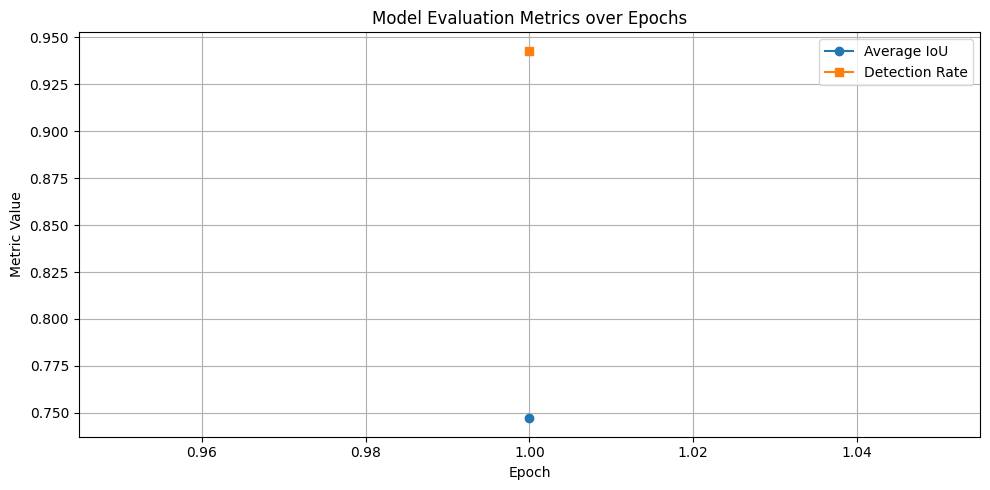

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, ious, label='Average IoU', marker='o')
plt.plot(epochs, detection_rates, label='Detection Rate', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visualizing 5 Random Test Predictions

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import torchvision.transforms.functional as F
import torch
import math

def visualize_predictions(model, dataset, device, num_images=9, score_threshold=0.5):
    """
    Visualizes predictions from the model on random samples from the dataset.
    Displays all selected images in a grid of subplots.
    """
    model.eval()
    indices = random.sample(range(len(dataset)), num_images)

    cols = min(num_images, 3)
    rows = math.ceil(num_images / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axs = axs.flatten() if num_images > 1 else [axs]

    for ax, idx in zip(axs, indices):
        image, target = dataset[idx]
        img_tensor = image.to(device).unsqueeze(0)

        with torch.no_grad():
            prediction = model(img_tensor)[0]

        img = image.cpu()
        img = F.to_pil_image(img)
        ax.imshow(img)
        ax.set_title(f"Image #{idx}")
        ax.axis('off')

        for box in target['boxes']:
            x_min, y_min, x_max, y_max = box
            width, height = x_max - x_min, y_max - y_min
            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='green', facecolor='none')
            ax.add_patch(rect)
            ax.text(x_min, y_min - 5, 'GT', color='green', fontsize=8, weight='bold')

        for box, score in zip(prediction['boxes'], prediction['scores']):
            if score >= score_threshold:
                x_min, y_min, x_max, y_max = box.cpu()
                width, height = x_max - x_min, y_max - y_min
                rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
                ax.add_patch(rect)
                ax.text(x_min, y_min - 5, f"Pred ({score:.2f})", color='red', fontsize=8, weight='bold')

    for i in range(num_images, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

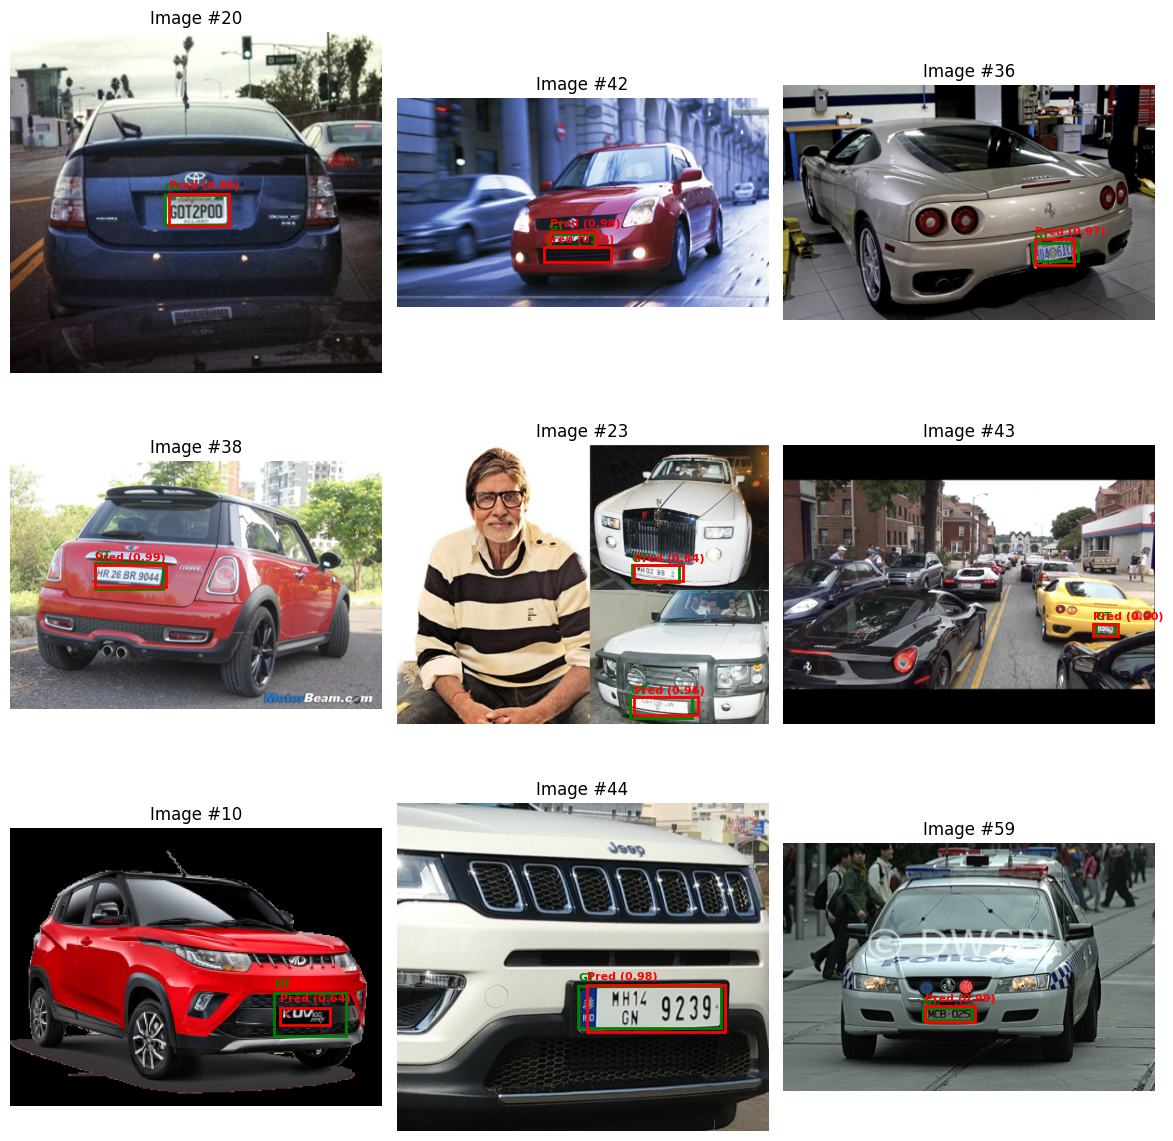

In [ ]:
visualize_predictions(model, test_dataset, device, score_threshold=0.5)

#### Saving the Predicted Bounding Boxes

In [ ]:
model.eval()

all_predictions = {}

with torch.no_grad():
    for idx, (images, targets) in enumerate(test_loader):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for i, output in enumerate(outputs):
            image_id = targets[i]["image_id"].item()

            boxes = output["boxes"].cpu().numpy().tolist()
            scores = output["scores"].cpu().numpy().tolist()
            labels = output["labels"].cpu().numpy().tolist()

            threshold = 0.5
            filtered = [
                {
                    "box": box,
                    "score": score,
                    "label": label
                }
                for box, score, label in zip(boxes, scores, labels)
                if score > threshold
            ]

            all_predictions[image_id] = filtered

In [295]:
import xml.etree.ElementTree as ET
from xml.dom import minidom

def create_xml_annotation(filename, width, height, boxes, save_dir="predicted_annotations"):
    os.makedirs(save_dir, exist_ok=True)

    annotation = ET.Element("annotation")

    ET.SubElement(annotation, "folder").text = "images"
    ET.SubElement(annotation, "filename").text = filename

    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    ET.SubElement(annotation, "segmented").text = "0"

    for box in boxes:
        obj = ET.SubElement(annotation, "object")
        ET.SubElement(obj, "name").text = "licence"
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = "0"
        ET.SubElement(obj, "occluded").text = "0"
        ET.SubElement(obj, "difficult").text = "0"

        bndbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(int(box[0]))
        ET.SubElement(bndbox, "ymin").text = str(int(box[1]))
        ET.SubElement(bndbox, "xmax").text = str(int(box[2]))
        ET.SubElement(bndbox, "ymax").text = str(int(box[3]))

    rough_string = ET.tostring(annotation, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    pretty_xml = reparsed.toprettyxml(indent="  ")

    xml_filename = os.path.join(save_dir, filename.replace('.png', '.xml'))
    with open(xml_filename, 'w') as f:
        f.write(pretty_xml)

    print(f"Saved: {xml_filename}")


model.eval()
all_predictions = {}

with torch.no_grad():
    for idx, (images, targets) in enumerate(test_loader):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for i, output in enumerate(outputs):
            boxes = output["boxes"].cpu().numpy().tolist()
            scores = output["scores"].cpu().numpy().tolist()

            threshold = 0.5
            filtered_boxes = [
                box for box, score in zip(boxes, scores) if score > threshold
            ]

            filename = targets[i]["filename"]
            width = images[i].shape[2]
            height = images[i].shape[1]

            create_xml_annotation(filename, width, height, filtered_boxes)



Saved: predicted_annotation/Cars339.xml
Saved: predicted_annotation/Cars236.xml
Saved: predicted_annotation/Cars51.xml
Saved: predicted_annotation/Cars203.xml
Saved: predicted_annotation/Cars197.xml
Saved: predicted_annotation/Cars99.xml
Saved: predicted_annotation/Cars119.xml
Saved: predicted_annotation/Cars96.xml
Saved: predicted_annotation/Cars420.xml
Saved: predicted_annotation/Cars3.xml
Saved: predicted_annotation/Cars268.xml
Saved: predicted_annotation/Cars202.xml
Saved: predicted_annotation/Cars256.xml
Saved: predicted_annotation/Cars342.xml
Saved: predicted_annotation/Cars358.xml
Saved: predicted_annotation/Cars302.xml
Saved: predicted_annotation/Cars0.xml
Saved: predicted_annotation/Cars163.xml
Saved: predicted_annotation/Cars367.xml
Saved: predicted_annotation/Cars317.xml
Saved: predicted_annotation/Cars254.xml
Saved: predicted_annotation/Cars327.xml
Saved: predicted_annotation/Cars209.xml
Saved: predicted_annotation/Cars316.xml
Saved: predicted_annotation/Cars374.xml
Saved: 

### **Model Development (OCR)**

### **Predict ocr_worth**:
using data from phase 2 we can predict if a picture is good enough to use ocr on

In [ ]:
# import pandas as pd
# import sqlite3
# import os
# import joblib
# from scripts.load_data import load_plate_features
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # === SETTINGS ===
# train_mode = True  # Set False for inference mode
# model_dir = "models"
# model_to_use = "random_forest"  # Used for DB update in inference mode
# os.makedirs(model_dir, exist_ok=True)

# db_path = os.path.join("database", "dataset.db")

# # === Load from database ===
# conn = sqlite3.connect(db_path)
# df1 = load_plate_features()
# df = df1.dropna(subset=['worth_ocr'])
# # === Prepare data ===
# features = ['blur_score', 'bbox_width', 'bbox_height', 'aspect_ratio', 'area_fraction']
# X = df[features]
# y = df['worth_ocr']

# # === Define Models ===
# model_defs = {
#     'random_forest': RandomForestClassifier(),
#     'log_reg': LogisticRegression(max_iter=1000),
#     'svm': SVC(probability=True),
#     'xgboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# }

# # === TRAINING MODE ===
# if train_mode:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#     for name, model in model_defs.items():
#         print(f"\n🧠 Training: {name}")
#         model.fit(X_train, y_train)
#         preds = model.predict(X_test)
#         print(f"📊 {name} performance:")
#         print(classification_report(y_test, preds))
#         joblib.dump(model, os.path.join(model_dir, f"{name}.pkl"))

#     print("✅ All models trained and saved.\n")

# # === INFERENCE MODE ===
# else:
#     all_model_preds = []
#     df_preds = df[['preprocessed_plate']].copy()

#     for model_name in model_defs.keys():
#         model_path = os.path.join(model_dir, f"{model_name}.pkl")
#         if not os.path.exists(model_path):
#             print(f"❌ Skipping {model_name}: model not found.")
#             continue

#         print(f"📥 Loading {model_name} model...")
#         model = joblib.load(model_path)
#         preds = model.predict(X)
#         df_preds[f'{model_name}_prediction'] = preds

#         # Add confidence if available
#         if hasattr(model, 'predict_proba'):
#             confs = model.predict_proba(X)[:, 1]
#             df_preds[f'{model_name}_conf'] = confs

#     df_preds.to_csv("predicted_worth_ocr_all_models.csv", index=False)
#     print("✅ All predictions saved to predicted_worth_ocr_all_models.csv")


